<a href="https://colab.research.google.com/github/caveligh/Colab_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab/Advertising.csv')

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


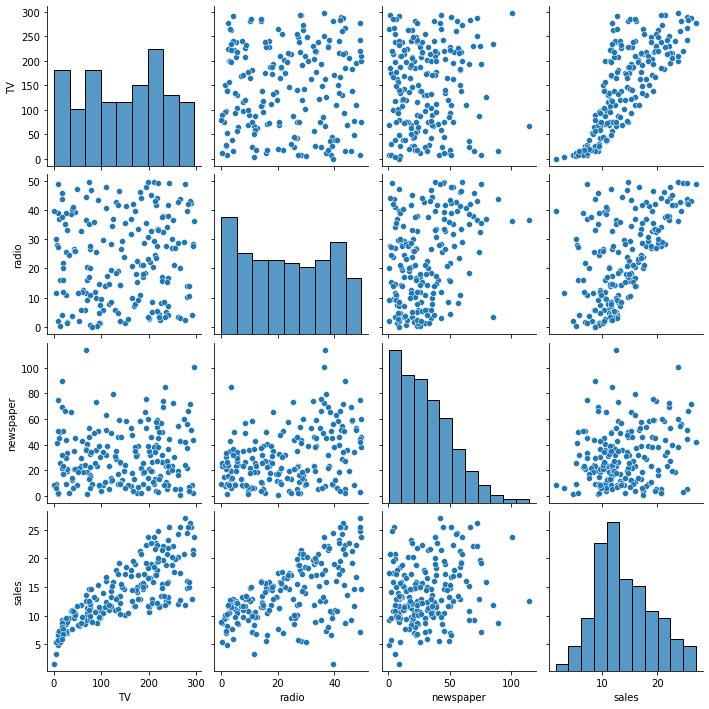

In [7]:
sns.pairplot(df)

In [9]:
X = df.drop('sales',axis=1)

In [10]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y = df['sales']

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
len(df)

200

In [16]:
# 30%
len(X_test)

60

In [17]:
# 70%
len(X_train)

140

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
df['sales'].mean()

14.022500000000003

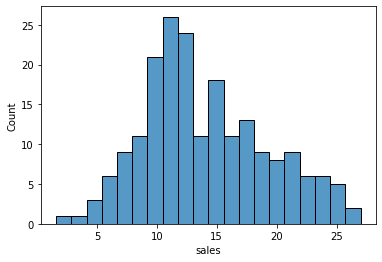

In [28]:
sns.histplot(df,x='sales', bins=20)

In [32]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [33]:
mean_squared_error(y_test,test_predictions)

2.298716697886379

In [36]:
#RMSE (Root Mean Square Error)  El modelo funciona en la mayoría de los puntos pero tiene algunos puntos de datos quyee estan muy lejos
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993882

In [37]:
test_residuals = y_test - test_predictions

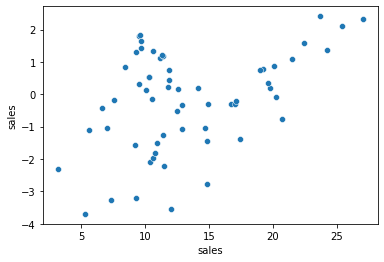

In [38]:
sns.scatterplot(x=y_test,y=test_residuals)

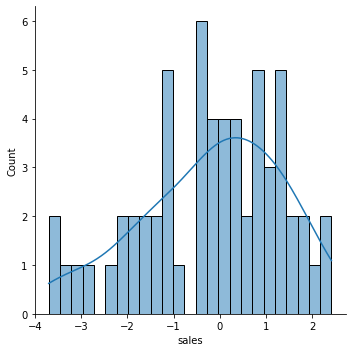

In [40]:
sns.displot(test_residuals,bins=25,kde=True)

In [41]:
import scipy as sp

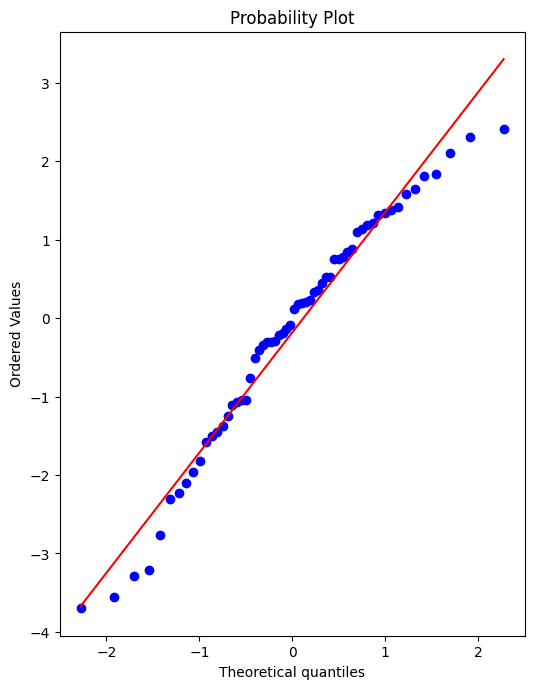

In [42]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [43]:
final_model = LinearRegression()

In [44]:
final_model.fit(X,y)

LinearRegression()

In [45]:
# Los coeficientes estan en la misma unidad: miles de USD
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
X.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [48]:
y_hat = final_model.predict(X)

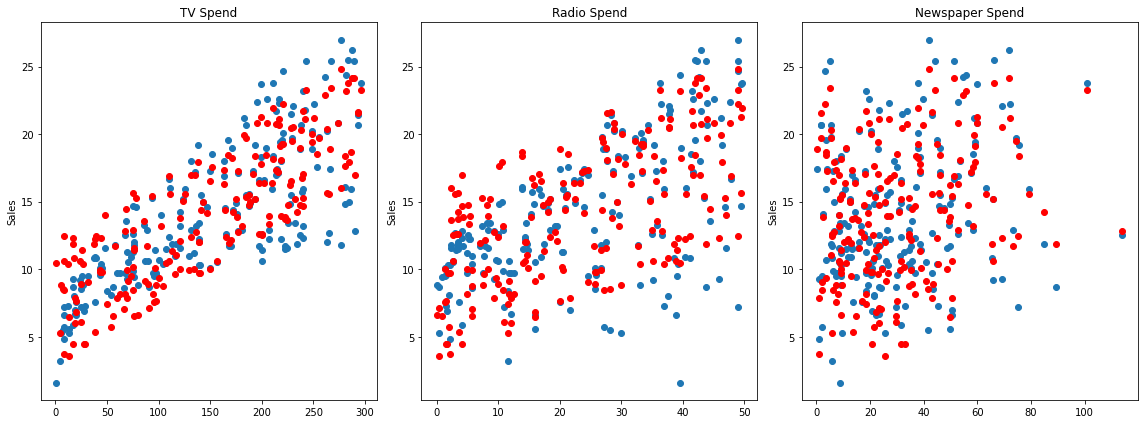

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

In [53]:
from joblib import dump, load

In [54]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [55]:
loaded_model = load('final_sales_model.joblib')

In [56]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [57]:
X.shape

(200, 3)

In [58]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [59]:
loaded_model.predict(campaign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])